## **London Crime**
This dataset is record of crime in major metropolitan areas, such as London, occurs in distinct patterns.

In [45]:
# libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# style plot
plt.style.use('fivethirtyeight')

## **Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# dataset
df_london = pd.read_csv('/content/drive/My Drive/dataset/london_crime_by_lsoa.csv')

In [ ]:
# View the Top 5 rows
df_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [ ]:
# View the bottom 5 rows
df_london.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


**This dataset contains**:


*   lsoa_Code : this represents a policing area
*   borough: The London borough for which the statistic is related
*   major_category : the major crime category
*   minor_category : the minor crime category
*   value: the count of the crime for that particular borough, in that particular month
*   year : the year of the summary statistic
*   Month: the month of the summary statistic









In [ ]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [ ]:
df_london.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [ ]:
df_london.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [ ]:
df_london.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603])

In [ ]:
df_london.shape

(13490604, 7)

In [ ]:
df_london.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [ ]:
criminal = df_london[df_london['value'] == 1]
criminal

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


In [ ]:
df_london.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


 ## **Data Analysis**

## **Data Analysis of London Crime Data, 2008-2016** 
Berikut merupakan dataset dari London Crime dengan total 13490604 rows x 7 columns. Dimana dataset ini menjelaskan mengenai angka kriminal yang terjadi di area metropolitan seperti London. Data ini mencakup jumlah laporan kriminal menurut bulan, wilayah LSOA, dan kategori mayor. minor dari Januari 2008 hingga Desember 2016


## **Question**


1. Berapa persentase untuk setiap kategori kriminal mayor?
2. Pada tahun ke berapa angka kriminalitas melonjak tinggi dan mengalami penurunan?
3. Pada tahun 2016, bulan apa yang memiliki angka kriminalitas yang tinggi?
4. Pada tahun 2016 major kategorial apa yang memiliki angka kriminalitas yang tertinggi dan terendah?
5. Minor kategori apa yang sering terjadi atau dibicarakan selama rentang tahun 2008-2016?
6. Di wilayah (London) apa saja terjadinya kriminalitas? (folium map)
7. Seberapa seringnya angka kriminalitas (frekuensi) di tiap wilayah London?(histogram)
8. Menelusuri angka kriminalitas untuk wilayah Croydon dan Lambeth dengan Box Plot
9. Melihat angka kriminalitas untuk 5 kategori tertinggi di tiap tahunnya


# **1. Berapa persentase untuk setiap kategori kriminal mayor?(Pie Chart)**
Mengetahui kategori apa saja yang memiliki angka kriminalitasnya tinggi di wilayah London

In [ ]:
str(df_london)

'          lsoa_code     borough  ...  year month\n0         E01001116     Croydon  ...  2016    11\n1         E01001646   Greenwich  ...  2016    11\n2         E01000677     Bromley  ...  2015     5\n3         E01003774   Redbridge  ...  2016     3\n4         E01004563  Wandsworth  ...  2008     6\n...             ...         ...  ...   ...   ...\n13490599  E01000504       Brent  ...  2015     2\n13490600  E01002504  Hillingdon  ...  2015     6\n13490601  E01004165      Sutton  ...  2011     2\n13490602  E01001134     Croydon  ...  2011     5\n13490603  E01003413      Merton  ...  2015     6\n\n[13490604 rows x 7 columns]'

In [ ]:
df_london["major_category"].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [ ]:
# Group by kolom Major Category dengan Value
jumlah = df_london.groupby(['major_category'], as_index=False)['value'].count() \
                  .rename(columns={'value': 'total'}) \
                  .sort_values('total', ascending=False)
jumlah

,major_category,total
7,Theft and Handling,3966300
8,Violence Against the Person,3171744
1,Criminal Damage,2069172
2,Drugs,1179468
0,Burglary,1043604
5,Robbery,939384
4,Other Notifiable Offences,776304
3,Fraud or Forgery,236520
6,Sexual Offences,108108


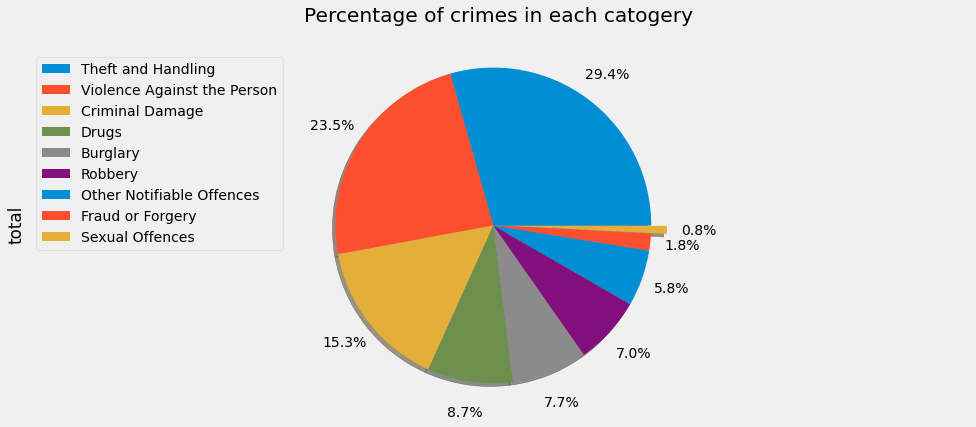

In [ ]:
# Visualisai Pie chart
labels=df_london['major_category'].unique()
jumlah = df_london.groupby(['major_category'], as_index=False)['value'].count() \
                  .rename(columns={'value': 'total'}) \
                  .sort_values('total', ascending=False)


jumlah["total"].plot(
    kind="pie",
    figsize=(15,6),
    autopct="%1.1f%%",
    labels=None, #df_london['major_category'].unique(),
    pctdistance=1.2,
    shadow=True,
    explode= [0.0, 0, 0, 0, 0, 0, 0, 0.0, 0.1]

)

plt.axis("equal")
plt.title("Percentage of crimes in each catogery\n")
plt.legend(labels=jumlah["major_category"], loc="upper left")
plt.show()

Pie chart tersebut menunjukkan presentase setiap kategori kriminal. Dari hasil visualisasi di atas ditemukan bahwa kategori kriminalitas di wilayah London yang paling tinggi adalah "Theft and Handling" yang memiliki presentase paling besar dibandingkan dengan jenis kriminal lainnya dengan nilai 29.4%. Disusul dengan kriminal "violence againts the person" dengan nilai 23.5%. Sedangkan kategori kriminalitas yang paling rendah terjadi di London adalah "sexual offences" dengan nilai 0.8%. Criminal Damage menduduki posisi ketiga dengan nilai persentase 15.3%, Drugs menduduki posisi ke empat dengan 8.7%, Robbery pada posisi ke lima dengan 7.0%, other notifiable offences dengan 5.8% dan Fraud or forgry menduduki posisi dua terakhir dengan nilai persentase 1.8%

## **2. Pada tahun ke berapa angka kriminalitas melonjak tinggi dan mengalami penurunan?(line plot)**
ingin mengetahui angka kriminalitas yang terjadi setiap tahunnya dari rentang 2008 hingga 2016

In [ ]:
# mencari total nilai setiap tahunnya
to_2008 = df_london.loc[(df_london.year == 2008)]
to_2009 = df_london.loc[(df_london.year == 2009)]
to_2010 = df_london.loc[(df_london.year == 2010)]

to_2011 = df_london.loc[(df_london.year == 2011)]
to_2012 = df_london.loc[(df_london.year == 2012)]
to_2013 = df_london.loc[(df_london.year == 2013)]

to_2014 = df_london.loc[(df_london.year == 2014)]
to_2015 = df_london.loc[(df_london.year == 2015)]
to_2016 = df_london.loc[(df_london.year == 2016)]

In [ ]:
total_2008 =to_2008["value"].sum()
total_2009 =to_2009["value"].sum()
total_2010 =to_2010["value"].sum()

total_2011 =to_2011["value"].sum()
total_2012 =to_2012["value"].sum()
total_2013 =to_2013["value"].sum()

total_2014 =to_2014["value"].sum()
total_2015 =to_2015["value"].sum()
total_2016 =to_2016["value"].sum()

print(total_2008)
print(total_2009)
print(total_2010)

print(total_2011)
print(total_2012)
print(total_2013)

print(total_2014)
print(total_2015)
print(total_2016)

738641
717214
715324
724915
737329
686407
680183
711624
736121


In [ ]:
# membuat data frame untuk menampung angka kriminalitas
year_sum = pd.DataFrame({'Angka_Kriminalitas' :[738641,717214,715324,724915,737329,686407,680183,711624,736121],
                           'year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
})
year_sum.set_index('year', inplace=True)
year_sum

,Angka_Kriminalitas
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


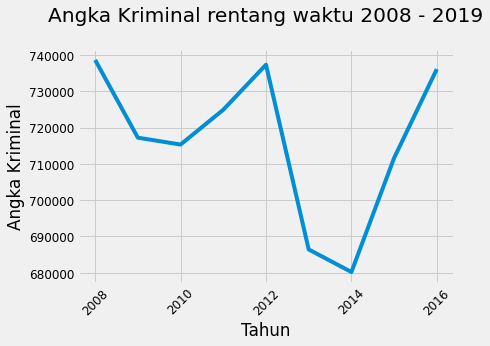

In [ ]:
# Visualisasi Line Plot 
plt.plot(year_sum)
plt.title("Angka Kriminal rentang waktu 2008 - 2019\n")
plt.xlabel('Tahun')
plt.ylabel("Angka Kriminal")


plt.xticks(rotation=45)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

berdasarkan visualisasi di atas ditemukan bahwa angka kriminalitas setiap tahunnya mengalami kenaikan dan penurunan.  Adanya penurunan yang cukup tajam dari tahun 2012 hingga menuju 2014, puncak penurunan terjadi pada tahun 2014. Namun adanya kenaikan kembali pada tahun 2015 hingga 2016. Dari hasil tersebut dinyatakan pada 2016, adanya peningkatan kejahatan sebesar 23% di London, dibandingkan dengan peningkatan 7% di Inggris secara lebih luas, yang merupakan sebagian besar dari peningkatan kejahatan yang tercatat di ibu kota.

## **3. Pada tahun 2016, bulan apa yang memiliki angka kriminalitas yang tinggi? (scatter plot)**
Dikarenakan pada tahun 2016 terjadi kenaikan kriminalitas untuk itu kita ingin lebih eksplorasi data pada tahun 2016, dengan mengetahui angka kriminalitas tiap bulannya. 


In [ ]:
# total nilai untuk bulan tertinggi dan terendah
tahun2016_7 = df_london.loc[(df_london.year == 2016) & (df_london.month == 7) ]
tahun2016_7 =tahun2016_7["value"].sum()

tahun2016_2 = df_london.loc[(df_london.year == 2016) & (df_london.month == 2) ]
tahun2016_2 =tahun2016_2["value"].sum()

print("bulan Juli:",tahun2016_7)
print("bulan Februari:",tahun2016_2)


bulan Juli: 65519
bulan Februari: 56697


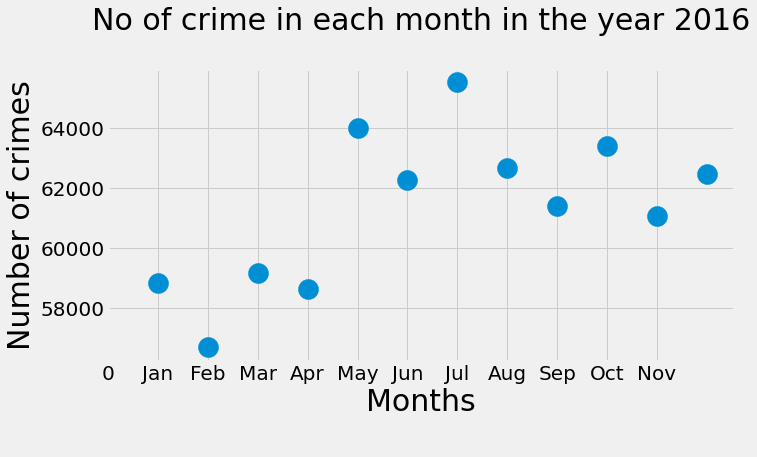

In [ ]:
# visualisasi scatter plot
year2016 = df_london.loc[df_london['year'] == 2016]
months= year2016['month'].unique()
months.sort()
sum_month = year2016.groupby(['month']).sum()
Values=sum_month['value'].to_numpy()
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
n1 = np.arange(len(months))
xrange = range(1,13)

plt.figure(figsize=(10,5))
plt.scatter(xrange, Values,s=400, alpha=1)

plt.title("No of crime in each month in the year 2016\n",fontsize=30)
plt.xlabel('Months\n',fontsize=30)
plt.ylabel('Number of crimes',fontsize=30)
plt.xticks(n1,name_of_months)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


Berdasarkan hasil scatter plot diketahui bahwa pada tahun 2016 yang memiliki angka kriminalitas tertinggi pada bulan Juli dengan nilai 65519. Sedangkan angka kriminalitas terendah pada bulan Februari dengan nilai 56697. Pada akhir bulan Juni memang terjadi pelonjakkan kasus kejahatan dan kebencian dikarena pada waktu tersebut Inggris memutuskan keluar dari Uni Eropa pada tanggal 23 Juni yang juga disebut Britain exit (Brexit).

## **4. Pada tahun 2016 major kategorial apa yang memiliki angka kriminalitas yang tertinggi dan terendah? (barplot)**

Dikarenakan kasus tertinggi pada tahun 2016, maka kita perlu mengetahui kategori kriminalitas apa yang sering terjadi  dan kriminalitas yang jarang terjadi pada tahun tersebut.





In [ ]:
df_london["major_category"].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [ ]:
# groupby untuk menemukan total value setiap kategori di tahun 2016
jumlah_major = df_london.groupby(['major_category','year'], as_index=False)['value'].count() \
                  .rename(columns={'value': 'total'}) \
                  .sort_values('total', ascending=False)

jumlah_major = jumlah_major.loc[jumlah_major["year"] == 2016]
jumlah_major

,major_category,year,total
71,Theft and Handling,2016,440700
80,Violence Against the Person,2016,352416
17,Criminal Damage,2016,229908
26,Drugs,2016,131052
8,Burglary,2016,115956
53,Robbery,2016,104376
44,Other Notifiable Offences,2016,86256
35,Fraud or Forgery,2016,26280
62,Sexual Offences,2016,12012


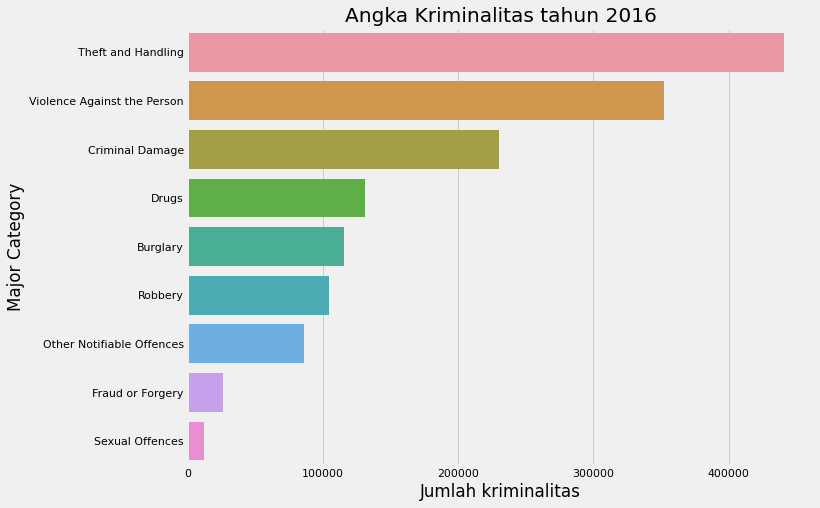

In [ ]:
# bar plot menggunakan seaborn
plt.figure(figsize=(10,7.5))
sns.barplot(data=jumlah_major, x='total', y='major_category')
#plt.xticks(rotation=-50)
plt.ylabel('Major Category')
plt.xlabel('Jumlah kriminalitas')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title("Angka Kriminalitas tahun 2016")
plt.show()


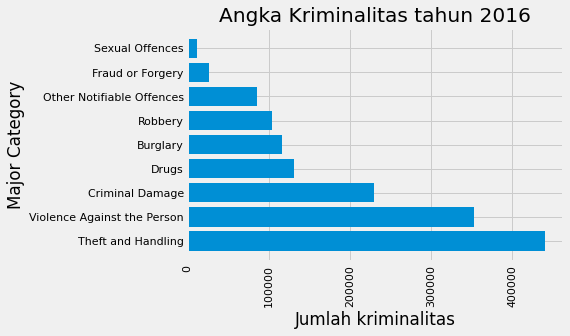

In [ ]:
# plot menggunakan matplotlib
y= jumlah_major['total']
x =jumlah_major['major_category']

x_pos = np.arange(len(x))

plt.barh(x,y)

plt.ylabel('Major Category')
plt.xlabel('Jumlah kriminalitas')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xticks(rotation=90)
plt.title("Angka Kriminalitas tahun 2016")
plt.show()


Angka kriminalitas paling tinggi pada tahun 2016 adalah theft and handling dengan nilai 440700. Kemudian disusul dengan kriminalitas violence againts the person dengan nilai 352416. Kejahatan terendah adalah kekerasan seksual (sexual offences) yaitu dengan total 12012. Kejahatan ini memudar pada tahun 2016.

## **5. Minor kategori apa yang sering terjadi atau dibicarakan selama rentang tahun 2008-2016? (wordcloud)**
Pada rentang tahun 2008 hingga 2016 minor kategori apa saja yang sering dibicarakan.

In [ ]:
df_london.minor_category.value_counts()

Other Theft                               522180
Common Assault                            522180
Theft From Motor Vehicle                  522180
Burglary in Other Buildings               522072
Harassment                                522072
Theft/Taking Of Motor Vehicle             522072
Criminal Damage To Motor Vehicle          521964
Other Criminal Damage                     521856
Assault with Injury                       521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

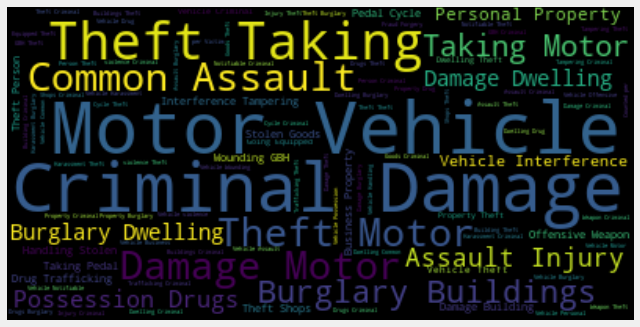

In [ ]:
# start with one category
text = df_london.minor_category

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(text))

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

berdasarkan hasil visualisasi wordcloud kata yang sering muncul adalah pencurian kendaraan motor. Sesuai dengan word cloud yang ditampilkan. Kasus pencurian dan pencurian kendaran bermotor memang menyumbang 50% dari kejahatan yang tercatat di kepolisian metropolitan selama rentang 2008-2016.

In [ ]:
#minor = df_london.minor_category
#len(max(minor, key=len))

##**6. Di wilayah (London) apa saja terjadinya kriminalitas? (folium map)** 

In [ ]:
# Data frame untuk menampung list latitude dan longitude setiap wilayah
location = pd.DataFrame({'latitude': [51.36782,51.46759,51.36682,51.58629,51.45146,51.52507,51.46179,51.53117,51.35875,51.58792,51.45987,51.44039,51.54248,51.55949,51.55540,51.41750,51.51227, 51.54879, 51.64875, 51.59193, 51.45336, 51.56401, 51.46473, 51.61266,51.59822,51.54281,51.46096,51.50383, 51.54702, 51.51533, 51.49878, 51.41080,51.51504],
                        'longitude': [-0.1172587,0.0138567,-0.0294160,0.0440625,-0.2277559,-0.3673734,-0.3879084,0.0031869,-0.2401147,-0.1413857,-0.1497883,-0.3428569,-0.5131911,0.1660386,0.0934001,-0.3007084,-0.1986143,-0.0955382,-0.1324392,-0.3681222,-0.0530433,-0.2985532,-0.1064527,-0.2874114,-0.0533004,-0.1944448,0.1110177,-0.2068739,-0.1444662,-0.0699900,-0.2522195,-0.2242007,-0.1020398],
                         'Borough' : ['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth','Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth','Richmond upon Thames', 'Hillingdon', 'Havering','Barking and Dagenham', 'Kingston upon Thames', 'Westminster','Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark','Barnet', 'Waltham Forest', 'Camden', 'Bexley','Kensington and Chelsea', 'Islington', 'Tower Hamlets','Hammersmith and Fulham', 'Merton', 'City of London']
                         
})
location.head()

,latitude,longitude,Borough
0,51.36782,-0.117259,Croydon
1,51.46759,0.013857,Greenwich
2,51.36682,-0.029416,Bromley
3,51.58629,0.044062,Redbridge
4,51.45146,-0.227756,Wandsworth


In [ ]:
df_london["borough"].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [ ]:
df_london["lsoa_code"].value_counts()

E01003783    3456
E01004735    3456
E01001010    3456
E01003689    3456
E01001043    3456
             ... 
E01001101    1836
E01000001    1728
E01032775    1728
E01000002    1080
E01000003     648
Name: lsoa_code, Length: 4835, dtype: int64

In [ ]:
# assign latitude dan longtitude setiap wilayah dan visualisasi pada folium map
m = folium.Map(location=[51.509865, -0.118092], zoom_start=11, tiles="Stamen Terrain")

folium.Marker(
    location=[51.36782,-0.117259],
    popup="Croydon",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.46759,0.013857],
    popup="Greenwich",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.36682,-0.029416],
    popup="Bromley",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.58629,0.044062],
    popup="Redbridge",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.45146,-0.227756],
    popup="Wandsworth",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.52507,-0.367373],
    popup="Ealing",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.46179,-0.387908],
    popup="Hounslow",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.53117,0.003187],
    popup="Newham",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)
         
folium.Marker(
    location=[51.35875,-0.240115],
    popup="Sutton",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.58792,-0.141386],
    popup="Haringey",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.45987,-0.149788],
    popup="Lambeth",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)
         
folium.Marker(
    location=[51.44039,-0.342857],
    popup="Richmond upon Thames",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)
   
#
folium.Marker(
    location=[51.54248,-0.513191],
    popup="Hillingdon",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.55949,0.166039],
    popup="Havering",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.55540,0.093400],
    popup="Barking and Dagenham",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.41750,-0.300708],
    popup="Kingston upon Thames",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.51227,-0.198614],
    popup="Westminster",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.54879,-0.095538],
    popup="Hackney",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.64875,-0.132439],
    popup="Enfield",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.59193,-0.368122],
    popup="Harrow",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)
         
folium.Marker(
    location=[51.45336,-0.053043],
    popup="Lewisham",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.56401,-0.298553],
    popup="Brent",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.46473,-0.106453],
    popup="Southwark",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)
         
folium.Marker(
    location=[51.61266,-0.287411],
    popup="Barnet",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)
##
folium.Marker(
    location=[51.59822,-0.053300],
    popup="Waltham Forest",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.54281,-0.194445],
    popup="Camden",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.46096,0.111018],
    popup="Bexley",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.50383,-0.206874],
    popup="Kensington and Chelsea",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.54702,-0.144466],
    popup="Islington",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.51533,-0.069990],
    popup="Tower Hamlets",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.49878,-0.252219],
    popup="Hammersmith and Fulham",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

folium.Marker(
    location=[51.41080,-0.224201],
    popup="Merton",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)
         
folium.Marker(
    location=[51.51504,-0.102040],
    popup="City of London'",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)

m

Berikut adalah visualisasi persebaran kriminalitas di daerah London ditandai dengan mark berwarna merah. Persebaran kriminalitas tersebar ke 32 tempat. 32 tempat itu adalah Croydon, Greenwich, Bromley, Redbridge, Wandsworth, Ealing, Hounslow, Newham, Sutton, Haringey, Lambeth, Richmond upon Thames, Hillingdon, Havering, Barking and Dagenham, Kingston upon Thames, Westminster, Hackney, Enfield, Harrow, Lewisham, Brent, Southwark, Barnet, Waltham Forest, Camden, Bexley, Kensington and Chelsea, Islington, Tower Hamlets,Hammersmith and Fulham, Merton, City of London.

## **7. Seberapa seringnya angka kriminalitas (frekuensi) di tiap wilayah London?(histogram)**
Jumlah angka kriminalitas untuk tiap wilayah pastinya selalu berbeda setiap tahunnya ada yang mengalami penurunan ataupun adanya kenaikan ataupun stabil. Oleh karena itu, diperlukan histogram untuk melihat frekuensi angka kriminalitas

In [ ]:
df_london["borough"].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [ ]:
# find total of Croydon
bo_2008 = df_london.loc[(df_london.year == 2008) & (df_london.borough== "Croydon")]
bo_2009 = df_london.loc[(df_london.year == 2009) & (df_london.borough == "Croydon")]
bo_2010 = df_london.loc[(df_london.year == 2010) & (df_london.borough == "Croydon")]

bo_2011 = df_london.loc[(df_london.year == 2011) & (df_london.borough == "Croydon")]
bo_2012 = df_london.loc[(df_london.year == 2012) & (df_london.borough == "Croydon")]
bo_2013 = df_london.loc[(df_london.year == 2013) & (df_london.borough == "Croydon")]

bo_2014 = df_london.loc[(df_london.year == 2014) & (df_london.borough == "Croydon")]
bo_2015 = df_london.loc[(df_london.year == 2015) & (df_london.borough == "Croydon")]
bo_2016 = df_london.loc[(df_london.year == 2016) & (df_london.borough == "Croydon")]

In [ ]:
totalb2008 =bo_2008["value"].sum()
totalb2009 =bo_2009["value"].sum()
totalb2010 =bo_2010["value"].sum()
 
totalb2011 =bo_2011["value"].sum()
totalb2012 =bo_2012["value"].sum()
totalb2013 =bo_2013["value"].sum()
 
totalb2014 =bo_2014["value"].sum()
totalb2015 =bo_2015["value"].sum()
totalb2016 =bo_2016["value"].sum()
 
print("total2008:",totalb2008)
print("total2009:",totalb2009)
print("total2010:",totalb2010)
 
print("total2011:",totalb2011)
print("total2012:",totalb2012)
print("total2013:",totalb2013)
 
print("total2014:",totalb2014)
print("total2015:",totalb2015)
print("total2016:",totalb2016)

total2008: 29516
total2009: 29784
total2010: 29373
total2011: 29830
total2012: 30189
total2013: 27444
total2014: 27357
total2015: 28089
total2016: 28712


In [ ]:
# find total of Barnet
ba_2008 = df_london.loc[(df_london.year == 2008) & (df_london.borough== "Barnet")]
ba_2009 = df_london.loc[(df_london.year == 2009) & (df_london.borough == "Barnet")]
ba_2010 = df_london.loc[(df_london.year == 2010) & (df_london.borough == "Barnet")]

ba_2011 = df_london.loc[(df_london.year == 2011) & (df_london.borough == "Barnet")]
ba_2012 = df_london.loc[(df_london.year == 2012) & (df_london.borough == "Barnet")]
ba_2013 = df_london.loc[(df_london.year == 2013) & (df_london.borough == "Barnet")]

ba_2014 = df_london.loc[(df_london.year == 2014) & (df_london.borough == "Barnet")]
ba_2015 = df_london.loc[(df_london.year == 2015) & (df_london.borough == "Barnet")]
ba_2016 = df_london.loc[(df_london.year == 2016) & (df_london.borough == "Barnet")]

In [ ]:
totalba2008 =ba_2008["value"].sum()
totalba2009 =ba_2009["value"].sum()
totalba2010 =ba_2010["value"].sum()

totalba2011 =ba_2011["value"].sum()
totalba2012 =ba_2012["value"].sum()
totalba2013 =ba_2013["value"].sum()

totalba2014 =ba_2014["value"].sum()
totalba2015 =ba_2015["value"].sum()
totalba2016 =ba_2016["value"].sum()

print("total2008:",totalba2008)
print("total2009:",totalba2009)
print("total2010:",totalba2010)

print("total2011:",totalba2011)
print("total2012:",totalba2012)
print("total2013:",totalba2013)

print("total2014:",totalba2014)
print("total2015:",totalba2015)
print("total2016:",totalba2016)

total2008: 23944
total2009: 23449
total2010: 23416
total2011: 24007
total2012: 23573
total2013: 22510
total2014: 22572
total2015: 24036
total2016: 24684


In [ ]:
# find total of Ealing
be_2008 = df_london.loc[(df_london.year == 2008) & (df_london.borough== "Ealing")]
be_2009 = df_london.loc[(df_london.year == 2009) & (df_london.borough == "Ealing")]
be_2010 = df_london.loc[(df_london.year == 2010) & (df_london.borough == "Ealing")]

be_2011 = df_london.loc[(df_london.year == 2011) & (df_london.borough == "Ealing")]
be_2012 = df_london.loc[(df_london.year == 2012) & (df_london.borough == "Ealing")]
be_2013 = df_london.loc[(df_london.year == 2013) & (df_london.borough == "Ealing")]

be_2014 = df_london.loc[(df_london.year == 2014) & (df_london.borough == "Ealing")]
be_2015 = df_london.loc[(df_london.year == 2015) & (df_london.borough == "Ealing")]
be_2016 = df_london.loc[(df_london.year == 2016) & (df_london.borough == "Ealing")]

In [ ]:
totalbe2008 =be_2008["value"].sum()
totalbe2009 =be_2009["value"].sum()
totalbe2010 =be_2010["value"].sum()

totalbe2011 =be_2011["value"].sum()
totalbe2012 =be_2012["value"].sum()
totalbe2013 =be_2013["value"].sum()

totalbe2014 =be_2014["value"].sum()
totalbe2015 =be_2015["value"].sum()
totalbe2016 =be_2016["value"].sum()

print(totalbe2008)
print(totalbe2009)
print(totalbe2010)

print(totalbe2011)
print(totalbe2012)
print(totalbe2013)

print(totalbe2014)
print(totalbe2015)
print(totalbe2016)

28947
28617
31360
29537
28832
25917
24978
26247
27127


In [ ]:
# find total of Bromley
br_2008 = df_london.loc[(df_london.year == 2008) & (df_london.borough== "Bromley")]
br_2009 = df_london.loc[(df_london.year == 2009) & (df_london.borough == "Bromley")]
br_2010 = df_london.loc[(df_london.year == 2010) & (df_london.borough == "Bromley")]

br_2011 = df_london.loc[(df_london.year == 2011) & (df_london.borough == "Bromley")]
br_2012 = df_london.loc[(df_london.year == 2012) & (df_london.borough == "Bromley")]
br_2013 = df_london.loc[(df_london.year == 2013) & (df_london.borough == "Bromley")]

br_2014 = df_london.loc[(df_london.year == 2014) & (df_london.borough == "Bromley")]
br_2015 = df_london.loc[(df_london.year == 2015) & (df_london.borough == "Bromley")]
br_2016 = df_london.loc[(df_london.year == 2016) & (df_london.borough == "Bromley")]

totalbr2008 =br_2008["value"].sum()
totalbr2009 =br_2009["value"].sum()
totalbr2010 =br_2010["value"].sum()

totalbr2011 =br_2011["value"].sum()
totalbr2012 =br_2012["value"].sum()
totalbr2013 =br_2013["value"].sum()

totalbr2014 =br_2014["value"].sum()
totalbr2015 =br_2015["value"].sum()
totalbr2016 =br_2016["value"].sum()

print(totalbr2008)
print(totalbr2009)
print(totalbr2010)

print(totalbr2011)
print(totalbr2012)
print(totalbr2013)

print(totalbr2014)
print(totalbr2015)
print(totalbr2016)

24015
21858
19572
19868
19622
18945
19668
20637
20164


In [ ]:
#find total of Lambeth

la_2008 = df_london.loc[(df_london.year == 2008) & (df_london.borough== "Lambeth")]
la_2009 = df_london.loc[(df_london.year == 2009) & (df_london.borough == "Lambeth")]
la_2010 = df_london.loc[(df_london.year == 2010) & (df_london.borough == "Lambeth")]

la_2011 = df_london.loc[(df_london.year == 2011) & (df_london.borough == "Lambeth")]
la_2012 = df_london.loc[(df_london.year == 2012) & (df_london.borough == "Lambeth")]
la_2013 = df_london.loc[(df_london.year == 2013) & (df_london.borough == "Lambeth")]

la_2014 = df_london.loc[(df_london.year == 2014) & (df_london.borough == "Lambeth")]
la_2015 = df_london.loc[(df_london.year == 2015) & (df_london.borough == "Lambeth")]
la_2016 = df_london.loc[(df_london.year == 2016) & (df_london.borough == "Lambeth")]

totalla2008 =la_2008["value"].sum()
totalla2009 =la_2009["value"].sum()
totalla2010 =la_2010["value"].sum()

totalla2011 =la_2011["value"].sum()
totalla2012 =la_2012["value"].sum()
totalla2013 =la_2013["value"].sum()

totalla2014 =la_2014["value"].sum()
totalla2015 =la_2015["value"].sum()
totalla2016 =la_2016["value"].sum()

print(totalla2008)
print(totalla2009)
print(totalla2010)

print(totalla2011)
print(totalla2012)
print(totalla2013)

print(totalla2014)
print(totalla2015)
print(totalla2016)

31717
31225
31671
33224
33473
31868
31765
33164
34071


In [46]:
# membuat data baru untuk keseluruhan total kriminalitas tiap wilayahnya per tahunnya.

Borough_Year = pd.DataFrame({'Croydon': [29516,29784,29373,29830,30189,27444,27357,28089,28712],
                            'Barnet': [23944,23449,23416,24007,23573,22510,22572,24036,24684],
                            'Ealing':[28947,28617,31360,29537,28832,25917,24978,26247,27127],
                            'Bromley':[24015,21858,19572,19868,19622,18945,19668,20637,20164],
                            'Lambeth':[31717,31225,31671,33224,33473,31868,31765,33164,34071],
                           'year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
})
Borough_Year.set_index('year', inplace=True)
Borough_Year =Borough_Year.T
Borough_Year 

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071


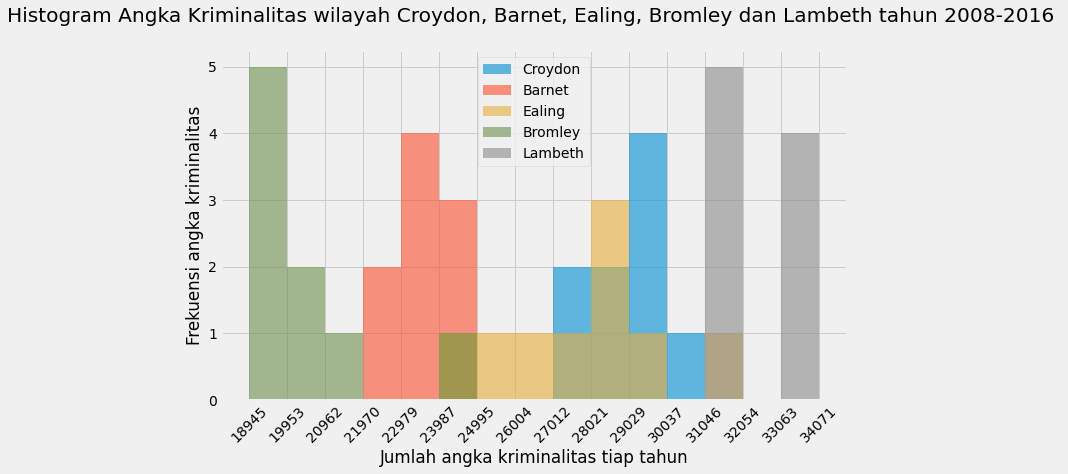

In [47]:
# Visualisasi Histogram
count, bin_edges = np.histogram(Borough_Year,15)

Borough_Year.T.plot(kind = 'hist', figsize=(10,6), bins=15, alpha=0.6, xticks=bin_edges)
plt.xlabel("Jumlah angka kriminalitas tiap tahun")
plt.ylabel("Frekuensi angka kriminalitas")
plt.title("Histogram Angka Kriminalitas wilayah Croydon, Barnet, Ealing, Bromley dan Lambeth tahun 2008-2016 \n")
plt.xticks(rotation=45)
plt.show()

Berdasarkan histogram di atas diketahui bahwa angka kriminalitas di Bromley lebih cenderung di antara 18.900 hingga 24.000 an (frekuensi tertinggi berada pada rentang 18945 hingga 19900). Angka kriminalitas di Bromley tidak pernah mencapai hingga 30.000 an. Sedangkan angka kriminalitas di Lambert lebih cenderung mencapai 31.000 an hingga 34.0000. Tentunya angka ini terbilang cukup stabil dibandingkan wilayah lainnya. Namun, adanya kekurangan dengan angka  frekuensi yang cukup stabil ini diartikan bahwa kriminalitas yang terjadi di daerah tersebut belum pernah mengalami penurunan yang tajam.

## **8. Menelusuri angka kriminalitas untuk wilayah Croydon dan Lambeth dengan Box Plot**
Dengan menelusuri angka kriminalitas untuk wilayah tertentu kita bisa mendapatkan informasi lebih detail dibanding hanya mengetahui total angka kriminalitas. Dengan box plot kita bisa mengetahui nilai rata-rata, min dan max untuk angka kriminalitasnnya.

In [50]:
# membuat Dataframe Borough_year
Borough_Year = pd.DataFrame({'Croydon': [29516,29784,29373,29830,30189,27444,27357,28089,28712],
                            'Barnet': [23944,23449,23416,24007,23573,22510,22572,24036,24684],
                            'Ealing':[28947,28617,31360,29537,28832,25917,24978,26247,27127],
                            'Bromley':[24015,21858,19572,19868,19622,18945,19668,20637,20164],
                            'Lambeth':[31717,31225,31671,33224,33473,31868,31765,33164,34071],
                           'year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
})
Borough_Year.set_index('year', inplace=True)
Borough_Year 

,Croydon,Barnet,Ealing,Bromley,Lambeth
year,,,,,
2008,29516,23944,28947,24015,31717
2009,29784,23449,28617,21858,31225
2010,29373,23416,31360,19572,31671
2011,29830,24007,29537,19868,33224
2012,30189,23573,28832,19622,33473
2013,27444,22510,25917,18945,31868
2014,27357,22572,24978,19668,31765
2015,28089,24036,26247,20637,33164
2016,28712,24684,27127,20164,34071


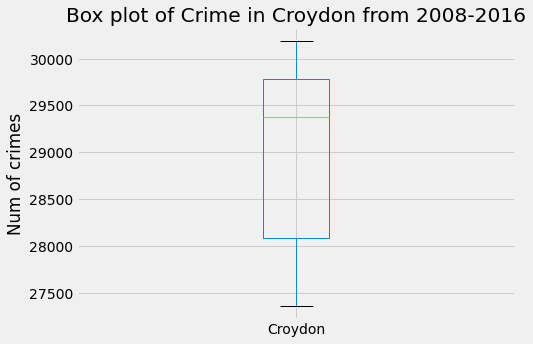

In [ ]:
# Visualisasi Box plot Croydon
Croydon = Borough_Year["Croydon"]
Croydon.plot(kind="box", figsize=(7,5))
plt.title("Box plot of Crime in Croydon from 2008-2016")
plt.ylabel("Num of crimes")
plt.show()

In [ ]:
Croydon.describe()

count        9.000000
mean     28921.555556
std       1066.579241
min      27357.000000
25%      28089.000000
50%      29373.000000
75%      29784.000000
max      30189.000000
Name: Croydon, dtype: float64

Berdasarkan plot di atas terdapat informasi seperti angka minimum kriminalitas yang pernah terjadi di Croydon adalah sekitar 27300, untuk angka maksimumnya pernah mencapai sekitar 30.000 lebih. Rata-rata untuk angka kriminalitas di Croydon adalah sekitar 29.3000. Disisi lain, informasi yang didapatkan dari plot di atas adalah 25% atau seperempat dari periode tahun 2008-2016, Croydon memiliki angka kriminalitas sebesar kurang lebih 28.000(first quartile). 75% dari periode 2008 - 2016, Croydon memiliki angka kriminalitas sebesar sekitar 29700 (Third quartile). Untuk bisa melihat angka aktual dengan memanggil metode describe(). 

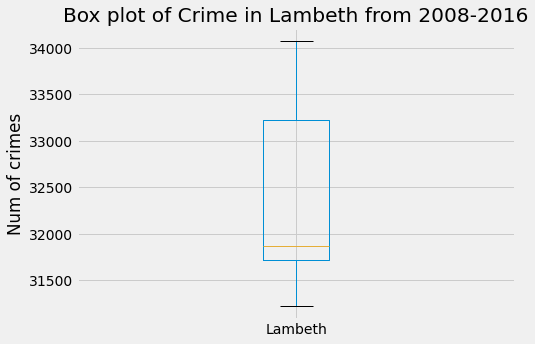

In [51]:
# Visualisasi Lambeth
Lambeth = Borough_Year["Lambeth"]
Lambeth.plot(kind="box", figsize=(7,5))
plt.title("Box plot of Crime in Lambeth from 2008-2016")
plt.ylabel("Num of crimes")
plt.show()

Berdasarkan plot di atas terdapat informasi seperti angka minimum kriminalitas yang pernah terjadi di Lambeth adalah sekitar 31225, untuk angka maksimumnya pernah mencapai sekitar 34.071. Rata-rata untuk angka kriminalitas di Lambeth adalah sekitar 32464. Disisi lain, informasi yang didapatkan dari plot di atas adalah 25% atau seperempat dari periode tahun 2008-2016, Lambeth memiliki angka kriminalitas sebesar kurang lebih 31717(first quartile). 75% dari periode 2008 - 2016, Lambeth memiliki angka kriminalitas sebesar sekitar 33224 (Third quartile). Untuk bisa melihat angka aktual dengan memanggil metode describe().

In [52]:
Lambeth.describe()

count        9.000000
mean     32464.222222
std       1014.515005
min      31225.000000
25%      31717.000000
50%      31868.000000
75%      33224.000000
max      34071.000000
Name: Lambeth, dtype: float64

##**9. Melihat angka kriminalitas untuk 5 kategori tertinggi di tiap tahunnya (area plot)**


In [ ]:
df_london.major_category.value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [ ]:
# finding number of theft and handling
Theft_2008 = df_london.loc[(df_london.year == 2008) & (df_london.major_category == "Theft and Handling")]
Theft_2009 = df_london.loc[(df_london.year == 2009) & (df_london.major_category == "Theft and Handling")]
Theft_2010 = df_london.loc[(df_london.year == 2010) & (df_london.major_category == "Theft and Handling")]

Theft_2011 = df_london.loc[(df_london.year == 2011) & (df_london.major_category == "Theft and Handling")]
Theft_2012 = df_london.loc[(df_london.year == 2012) & (df_london.major_category == "Theft and Handling")]
Theft_2013 = df_london.loc[(df_london.year == 2013) & (df_london.major_category == "Theft and Handling")]

Theft_2014 = df_london.loc[(df_london.year == 2014) & (df_london.major_category == "Theft and Handling")]
Theft_2015 = df_london.loc[(df_london.year == 2015) & (df_london.major_category == "Theft and Handling")]
Theft_2016 = df_london.loc[(df_london.year == 2016) & (df_london.major_category == "Theft and Handling")]


In [ ]:
total2008 =Theft_2008["value"].sum()
total2009 =Theft_2009["value"].sum()
total2010 =Theft_2010["value"].sum()

total2011 =Theft_2011["value"].sum()
total2012 =Theft_2012["value"].sum()
total2013 =Theft_2013["value"].sum()

total2014 =Theft_2014["value"].sum()
total2015 =Theft_2015["value"].sum()
total2016 =Theft_2016["value"].sum()

print("total2008:",total2008)
print("total2009:",total2009)
print("total2010:",total2010)

print("total2011:",total2011)
print("total2012:",total2012)
print("total2013:",total2013)

print("total2014:",total2014)
print("total2015:",total2015)
print("total2016:",total2016)

total2008: 283692
total2009: 279492
total2010: 290924
total2011: 309292
total2012: 334054
total2013: 306372
total2014: 279880
total2015: 284022
total2016: 294133


In [ ]:
# finding number of Violence Againts the Person
violence_2008 = df_london.loc[(df_london.year == 2008) & (df_london.major_category == "Violence Against the Person")]
violence_2009 = df_london.loc[(df_london.year == 2009) & (df_london.major_category == "Violence Against the Person")]
violence_2010 = df_london.loc[(df_london.year == 2010) & (df_london.major_category == "Violence Against the Person")]

violence_2011 = df_london.loc[(df_london.year == 2011) & (df_london.major_category == "Violence Against the Person")]
violence_2012 = df_london.loc[(df_london.year == 2012) & (df_london.major_category == "Violence Against the Person")]
violence_2013 = df_london.loc[(df_london.year == 2013) & (df_london.major_category == "Violence Against the Person")]

violence_2014 = df_london.loc[(df_london.year == 2014) & (df_london.major_category == "Violence Against the Person")]
violence_2015 = df_london.loc[(df_london.year == 2015) & (df_london.major_category == "Violence Against the Person")]
violence_2016 = df_london.loc[(df_london.year == 2016) & (df_london.major_category == "Violence Against the Person")]


In [ ]:
totalv2008 =violence_2008["value"].sum()
totalv2009 =violence_2009["value"].sum()
totalv2010 =violence_2010["value"].sum()

totalv2011 =violence_2011["value"].sum()
totalv2012 =violence_2012["value"].sum()
totalv2013 =violence_2013["value"].sum()

totalv2014 =violence_2014["value"].sum()
totalv2015 =violence_2015["value"].sum()
totalv2016 =violence_2016["value"].sum()

print("total2008:",totalv2008)
print("total2009:",totalv2009)
print("total2010:",totalv2010)

print("total2011:",totalv2011)
print("total2012:",totalv2012)
print("total2013:",totalv2013)

print("total2014:",totalv2014)
print("total2015:",totalv2015)
print("total2016:",totalv2016)

total2008: 159844
total2009: 160777
total2010: 157894
total2011: 146901
total2012: 150014
total2013: 146181
total2014: 185349
total2015: 218740
total2016: 232381


In [ ]:
# finding number of Criminal Damage
criminaldam_2008 = df_london.loc[(df_london.year == 2008) & (df_london.major_category == "Criminal Damage")]
criminaldam_2009 = df_london.loc[(df_london.year == 2009) & (df_london.major_category == "Criminal Damage")]
criminaldam_2010 = df_london.loc[(df_london.year == 2010) & (df_london.major_category == "Criminal Damage")]

criminaldam_2011 = df_london.loc[(df_london.year == 2011) & (df_london.major_category == "Criminal Damage")]
criminaldam_2012 = df_london.loc[(df_london.year == 2012) & (df_london.major_category == "Criminal Damage")]
criminaldam_2013 = df_london.loc[(df_london.year == 2013) & (df_london.major_category == "Criminal Damage")]

criminaldam_2014 = df_london.loc[(df_london.year == 2014) & (df_london.major_category == "Criminal Damage")]
criminaldam_2015 = df_london.loc[(df_london.year == 2015) & (df_london.major_category == "Criminal Damage")]
criminaldam_2016 = df_london.loc[(df_london.year == 2016) & (df_london.major_category == "Criminal Damage")]

totalc2008 =criminaldam_2008["value"].sum()
totalc2009 =criminaldam_2009["value"].sum()
totalc2010 =criminaldam_2010["value"].sum()

totalc2011 =criminaldam_2011["value"].sum()
totalc2012 =criminaldam_2012["value"].sum()
totalc2013 =criminaldam_2013["value"].sum()

totalc2014 =criminaldam_2014["value"].sum()
totalc2015 =criminaldam_2015["value"].sum()
totalc2016 =criminaldam_2016["value"].sum()

print(totalc2008)
print(totalc2009)
print(totalc2010)

print(totalc2011)
print(totalc2012)
print(totalc2013)

print(totalc2014)
print(totalc2015)
print(totalc2016)


91872
85565
77897
70914
62158
56206
59279
62976
64071


In [ ]:
# finding number of Drugs
Drugs_2008 = df_london.loc[(df_london.year == 2008) & (df_london.major_category == "Drugs")]
Drugs_2009 = df_london.loc[(df_london.year == 2009) & (df_london.major_category == "Drugs")]
Drugs_2010 = df_london.loc[(df_london.year == 2010) & (df_london.major_category == "Drugs")]

Drugs_2011 = df_london.loc[(df_london.year == 2011) & (df_london.major_category == "Drugs")]
Drugs_2012 = df_london.loc[(df_london.year == 2012) & (df_london.major_category == "Drugs")]
Drugs_2013 = df_london.loc[(df_london.year == 2013) & (df_london.major_category == "Drugs")]

Drugs_2014 = df_london.loc[(df_london.year == 2014) & (df_london.major_category == "Drugs")]
Drugs_2015 = df_london.loc[(df_london.year == 2015) & (df_london.major_category == "Drugs")]
Drugs_2016 = df_london.loc[(df_london.year == 2016) & (df_london.major_category == "Drugs")]

In [ ]:
totald2008 =Drugs_2008["value"].sum()
totald2009 =Drugs_2009["value"].sum()
totald2010 =Drugs_2010["value"].sum()

totald2011 =Drugs_2011["value"].sum()
totald2012 =Drugs_2012["value"].sum()
totald2013 =Drugs_2013["value"].sum()

totald2014 =Drugs_2014["value"].sum()
totald2015 =Drugs_2015["value"].sum()
totald2016 =Drugs_2016["value"].sum()

print(totald2008)
print(totald2009)
print(totald2010)

print(totald2011)
print(totald2012)
print(totald2013)

print(totald2014)
print(totald2015)
print(totald2016)

68804
60549
58674
57550
51776
50278
44435
39785
38914


In [ ]:
# finding number of Bulgary
Burglary_2008 = df_london.loc[(df_london.year == 2008) & (df_london.major_category == "Burglary")]
Burglary_2009 = df_london.loc[(df_london.year == 2009) & (df_london.major_category == "Burglary")]
Burglary_2010 = df_london.loc[(df_london.year == 2010) & (df_london.major_category == "Burglary")]

Burglary_2011 = df_london.loc[(df_london.year == 2011) & (df_london.major_category == "Burglary")]
Burglary_2012 = df_london.loc[(df_london.year == 2012) & (df_london.major_category == "Burglary")]
Burglary_2013 = df_london.loc[(df_london.year == 2013) & (df_london.major_category == "Burglary")]

Burglary_2014 = df_london.loc[(df_london.year == 2014) & (df_london.major_category == "Burglary")]
Burglary_2015 = df_london.loc[(df_london.year == 2015) & (df_london.major_category == "Burglary")]
Burglary_2016 = df_london.loc[(df_london.year == 2016) & (df_london.major_category == "Burglary")]

totalbu2008 =Burglary_2008["value"].sum()
totalbu2009 =Burglary_2009["value"].sum()
totalbu2010 =Burglary_2010["value"].sum()

totalbu2011 =Burglary_2011["value"].sum()
totalbu2012 =Burglary_2012["value"].sum()
totalbu2013 =Burglary_2013["value"].sum()

totalbu2014 =Burglary_2014["value"].sum()
totalbu2015 =Burglary_2015["value"].sum()
totalbu2016 =Burglary_2016["value"].sum()

print(totalbu2008)
print(totalbu2009)
print(totalbu2010)

print(totalbu2011)
print(totalbu2012)
print(totalbu2013)

print(totalbu2014)
print(totalbu2015)
print(totalbu2016)

88092
90619
86826
93315
93392
87222
76053
70489
68285


In [ ]:
numberofMajor = pd.DataFrame({
                           'Burglary':[88092,90619,86826,93315,93392,87222,76053,70489,68285],
                           'Drugs':[68804,60549,58674,57550,51776,50278,44435,39785,38914],
                           'Criminal Damage':[91872,85565,77897,70914,62158,56206,59279,62976,64071],
                           'Violence Against the Person': [159844,160777,157894,146901,150014,146181,185349,218740,232381],
                           'Theft and Handling': [283692,279492,290924,309292,334054,306372,279880,284022,294133],
                           'year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
})
numberofMajor.set_index('year', inplace=True)
numberofMajor


,Burglary,Drugs,Criminal Damage,Violence Against the Person,Theft and Handling
year,,,,,
2008,88092,68804,91872,159844,283692
2009,90619,60549,85565,160777,279492
2010,86826,58674,77897,157894,290924
2011,93315,57550,70914,146901,309292
2012,93392,51776,62158,150014,334054
2013,87222,50278,56206,146181,306372
2014,76053,44435,59279,185349,279880
2015,70489,39785,62976,218740,284022
2016,68285,38914,64071,232381,294133


In [ ]:
#numberofMajor.plot(kind="area", alpha =.8,figsize= (10,7))
#plt.xlabel("Years")
#plt.ylabel("Num of crimes")
#plt.title("Top 5 Criminals Trend")
#plt.show()

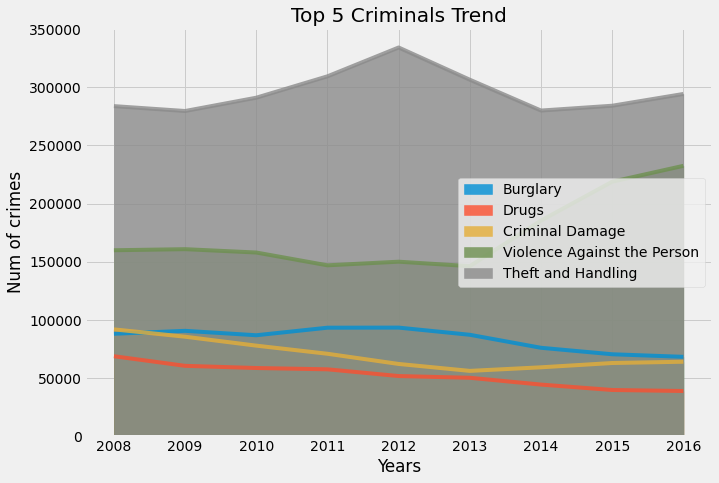

In [44]:
# Visualisasi Area plot
numberofMajor.index = numberofMajor.index.map(int)
numberofMajor.plot(kind='area', stacked=False, alpha=.8, figsize= (10,7))
plt.xlabel("Years")
plt.ylabel("Num of crimes")
plt.title("Top 5 Criminals Trend")
plt.show()

Berdasarkan hasil visualisasi di atas diketahui bahwa angka kriminalitas "Buglary" atau perampokan tidak pernah mencapai angka  100000. Dikarenakan sebagian besar rumah di London telah memiliki alat pendeteksi maling atau alarm maling, sehingga kejahatan ini hampir tidak pernah mencapai lebih dari 100000. Berbeda dengan kejahatan theft and handling yang angka kriminalitasnya mencapai hampir 300000. Pemicu kejahatan ini adalah banyaknya mahasiswa di daerah metropolitan, yang mana biaya perkuliahan mereka cukup tinggi hingga mencapai 9000 pounds per tahunnya. Tentunya mahasiswa tersebut memiliki uang jajan yang cukup dan juga mereka memilih tempat-tempat untuk belajar. Hal ini lah menjadi alasan tersangka mengincar mahasiswa- mahasiswa untuk melakukan pencurian.  Kejahatan ini lebih mudah untuk dilakukan dibandingkan kejahatan lainnya. Selain itu, biaya hidup juga mempengaruhi tindak kejahatan.

## **Kesimpulan**
kesimpulan dari hasil visualisasi yang sudah dilakukan di atas adalah 

**1. Berapa persentase untuk setiap kategori kriminal mayor?**
Persentase setiap kategori kriminal major
*   Theft and Handling : 29.4%
*   Violence Againts the Person : 23.5%
*   Criminal Damage : 15.3%
*   Drugs : 8.7%
*   Burglary : 7.7%
*   Robbery : 7.0%
*   Other Notifiable Offences : 5.8%
*   Fraud or Forgery : 1.8%
*   Sexual Offences : 0%

Dari hasil persentase tersebut diketahui bahwa Theft and Handling 29.4% yang memiliki persentase yang tinggi.


**2. Pada tahun ke berapa angka kriminalitas melonjak tinggi dan mengalami penurunan?**

Angka Kriminal selama rentang tahun 
2008-2016 selalu mengalami kenaikan dan penurunan. Adanya penurunan yang cukup tajam dari tahun 2012 hingga menuju 2014, puncak penurunan terjadi pada tahun 2014. Diketahui tahun 2016 merupakan puncak kenaikan angka kejahatan di London. Peningkatan tersebut sebesar 23%.


**3. Pada tahun 2016, bulan apa yang memiliki angka kriminalitas yang tinggi?**

Dari hasil visualisasi tersebut diketahui bahwa tingkat kriminalitas tertinggi pada bulan Juni 2016 yang diakibatkan adanya Britain Exit yaitu keluarnya Inggris dari Uni Eropa sehingga masyarakat menyuarakan kebencian dan kejahatan terhadap Inggris.


**4. Pada tahun 2016 major kategorial apa yang memiliki angka kriminalitas yang tertinggi dan terendah?**

Angka kriminalitas paling tinggi pada tahun 2016 adalah theft and handling dengan nilai 440700. Kejahatan terendah adalah kekerasan seksual (sexual offences) yaitu dengan total 12012. Kejahatan ini memudar pada tahun 2016.


**5. Minor kategori apa yang sering terjadi atau dibicarakan selama rentang tahun 2008-2016?**

Kasus pencurian kendaraan bermotor merupakan minor kategori yang sering terjadi pada periode 2008-2016.


**6. Di wilayah (London) apa saja terjadinya kriminalitas?**
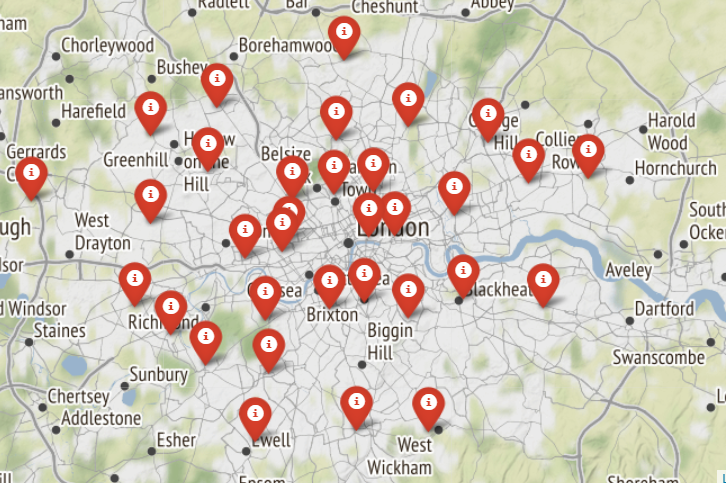
Wilayah persebaran kriminalitas di London


**7.  Seberapa seringnya angka kriminalitas (frekuensi) di tiap wilayah London?**

Melihat frekuensi seringnya angka kriminalitas tiap wilayah.
Bahwa daerah Lambert harus menjadi prioritas bagi pemerintah untuk mengurangi tingkat kriminalitas dikarenakan angka kriminalitas cukup stabil pada angka 30.000 an.
Di Bromley lebih cenderung di antara 18.900 hingga 24.000 an (frekuensi tertinggi berada pada rentang 18945 hingga 19900). Sedangkan Barnet frekuensi terringgi pada rentang 22979 hingga 23987 dan Ealing frekuensi tertingg pada angka 28021 hingga 29029.

**8. Menelusuri angka kriminalitas untuk wilayah Croydon dan Lambeth.**

Angka minimum kriminalitas yang pernah terjadi di Croydon adalah 27357, untuk angka maksimumnya pernah mencapai sekitar 30.189. Rata-rata untuk angka kriminalitas di Croydon adalah sekitar 29.373. Disisi lain, informasi yang didapatkan dari plot  adalah 25% atau seperempat dari periode tahun 2008-2016, Croydon memiliki angka kriminalitas sebesar 28.089(first quartile). 75% dari periode 2008 - 2016, Croydon memiliki angka kriminalitas sebesar 29784 (Third quartile). 

Angka minimum kriminalitas yang pernah terjadi di Lambeth adalah sekitar 31225, untuk angka maksimumnya pernah mencapai sekitar 34.071. Rata-rata untuk angka kriminalitas di Lambeth adalah sekitar 32464. Disisi lain, informasi yang didapatkan dari plot  adalah 25% atau seperempat dari periode tahun 2008-2016, Lambeth memiliki angka kriminalitas sebesar kurang lebih 31717(first quartile). 75% dari periode 2008 - 2016, Lambeth memiliki angka kriminalitas sebesar sekitar 33224 (Third quartile). Untuk bisa melihat angka aktual dengan memanggil metode describe().

**9. Melihat angka kriminalitas untuk 5 kategori tertinggi di tiap tahunnya.**

Kejahatan tertinggi tentunya tetap dipegang oleh Theft and Handling. Kejahatan ini tiap tahunnya selalu mencapai 30000 lebih. Sedangkan kriminalitas lainnya tidak pernah mencapai angka 30000. Kriminalitas lainnya hanya berada di rentang 80.000 hingga 100.000


**Kesimpulan**
Secara keseluruhan kita tahu bahwa angka kriminalitas paling tinggi yang terjadi di London pada tahun 2016. Kriminalitas yang sering terjadi adalah pencurian terutama kendaraan bermotor. Kemudian daerah yang sering terjadi kriminalitas adalah wilayah Lamberth. Melalui, box plot diketahui bahwa nilai maximal Lambeth adalah 31225. Hal ini menjadi prioritas bagi pemerintah London untuk menekan angka kriminalitas agar tidak semakin tinggi.